# TIPS Complete

A data frame with 244 observations on the following 8 variables.


**total_bill:** a numeric vector, the bill amount (dollars)

**tip:**a numeric vector, the tip amount (dollars)

**sex:** factor with levels Female Male, gender of the payer of the bill

**smoker:** factor with levels No Yes, whether the party included smokers

**day:** factor with levels Friday Saturday Sunday Thursday, day of the week

**time:** factor with levels Day Night, rough time of day

**size:** numeric vector, number of people in party

In [1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
from sklearn.linear_model import LinearRegression

__plot__=True

import warnings
warnings.filterwarnings('ignore')

preview_window=2

def split_dataset(corr_value , target:str = 'PRICE' ):
    X = corr_value.drop(columns=[target]) # is a Matrix
    y = corr_value[target]
    print(X.head(preview_window))
    return X,y


def correlation_plot(df):
    print("Correlation analisys")
    corrmat = df.corr()
    plt.figure(figsize = (12, 10))
    sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});
    plt.show()
    print(corrmat.index.values)
    print(df.columns.T)
    return corrmat

def get_correlated_feature(df, corrdata, threshold):
    """Toglie variabili sotto soglia"""
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])

    corr_value = pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
    print(corr_value.T)
    print(corr_value.index.values)
    corr_value = df[corr_value.index]
    print(corr_value.head(preview_window))
    print(corr_value.shape)
    if __plot__:
        sns.pairplot(corr_value)
        plt.tight_layout()
        plt.show()

    # iniziamo a vedere gli outlier per capire se il dominio ha senso
    _ = correlation_plot(corr_value)
    
    return corr_value


def plot_45_correlated_data( target:str = 'PRICE'):
    """It works only on 0.45 threshold for fixed dimensions"""
    rows = 3
    cols = 2
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (12, 3))

    col = df.columns
    index = 0

    for i in range(rows):
        for j in range(cols):
            sns.regplot(x = df[col[index]], y = df[target], ax = ax[i][j])
            index = index + 1
    fig.tight_layout()

def get_y_predict(corr_data,target:str = 'PRICE'):
    X = corr_data.drop(labels = [target], axis = 1)
    y = corr_data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 667)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred,y_test


total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
r2_adjusted_scores = []
mae_values = []
mse_values = []
rmse_values = []


def verifica_metriche(y_test,y_pred):

    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)
    adj_r2 = 1-(1-r2)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

    print(f'R2 score {r2}')
    print(f'MSE score {mse}')
    print(f'MAE score {mae}')
    print(f'RMSE score {rmse}') # Alto perchè il nostro modello sbaglia di 
                                # molto perchè abbiamo preso tutto il dataset, 
                                # forse abbiamo preso troppe variabili, anche variabili di "disturbo" 
    print('Adjusted_R2_score: ', adj_r2)
    return r2,mse,mae,rmse,adj_r2

def performance_metrics(features, th, y_true, y_pred):

    r2,mse,mae,rmse,adj_r2 = verifica_metriche(y_true, y_pred)

    total_features.append(len(features) - 1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(round(r2,2))
    r2_adjusted_scores.append(round(adj_r2,2))
    mae_values.append(round(mae,2))
    mse_values.append(round(mse,2))
    rmse_values.append(round(rmse,2))

    metrics_dataframe = pd.DataFrame(data=[total_features_name, total_features, selected_correlation_value,
                                           r2_scores, r2_adjusted_scores, mae_values, mse_values, rmse_values],
                                     index=['features name', '#feature', 'corr_value', 'R2', 'R2_adjusted', 'MAE', 'MSE', 'RMSE'])
    print('Performance Metrics')
    print(metrics_dataframe.T)

def ts_analisys(ts_list:list):
    
    for threshold in ts_list:
        target='tip'
        corr_value = get_correlated_feature(df , corrmat[target], threshold)
        print(corr_value.T)
        print(corr_value.head(preview_window))
        y_pred,y_test = get_y_predict(corr_value,target)
        performance_metrics(corr_value.columns.values, threshold, y_test, y_pred)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
            count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81
tip         244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625  10.00
size        244.0   2.569672  0.951100  1.00   2.0000   2.000   3.0000   6.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage:

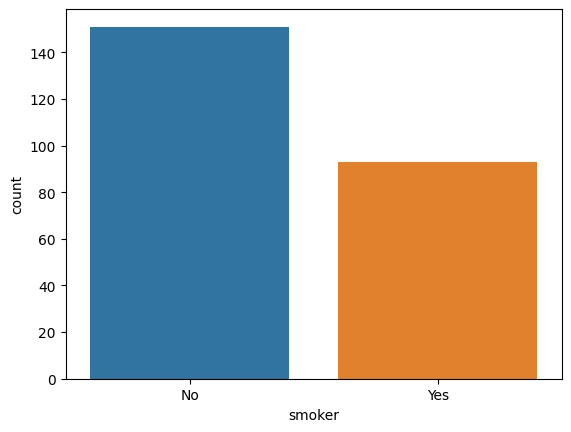

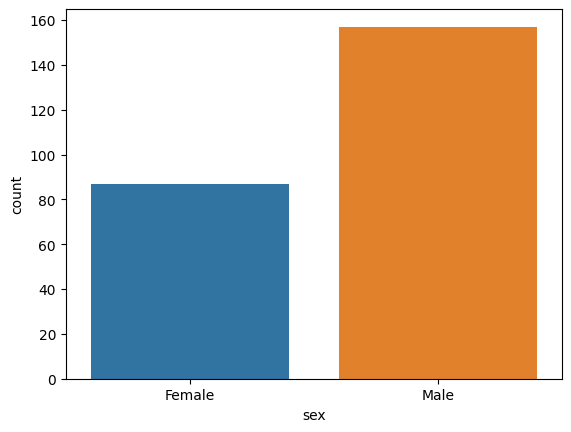

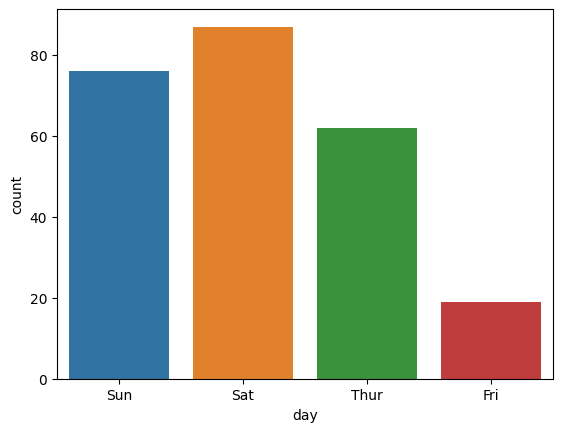

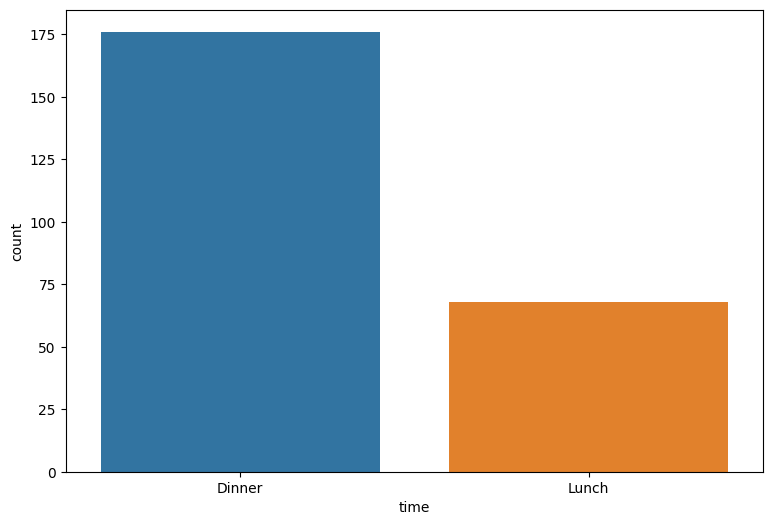

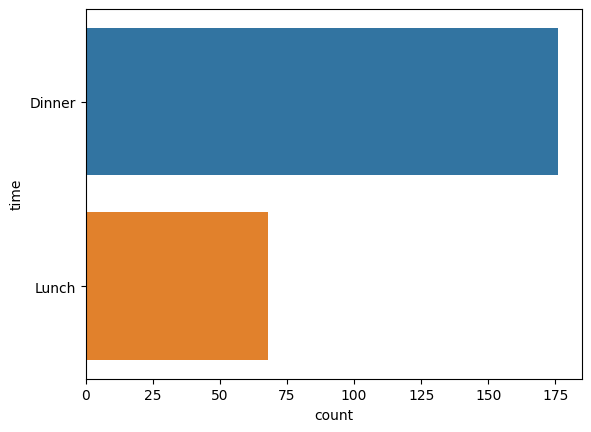

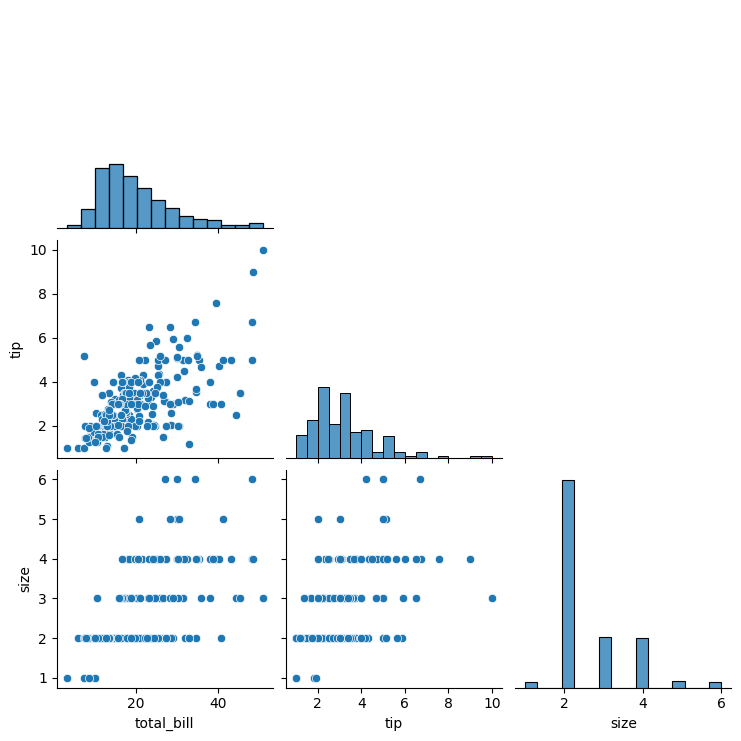

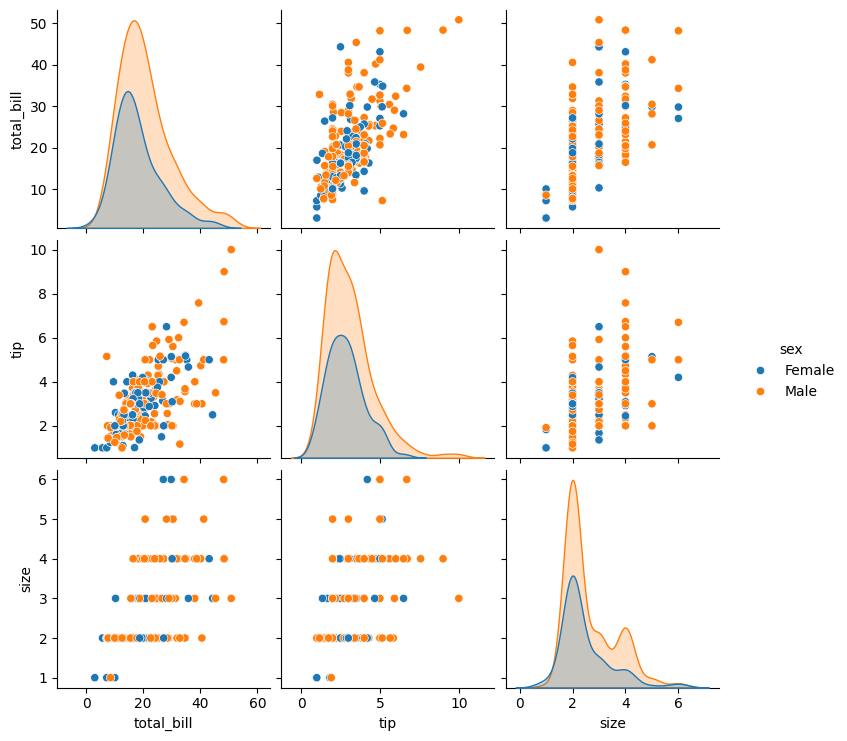

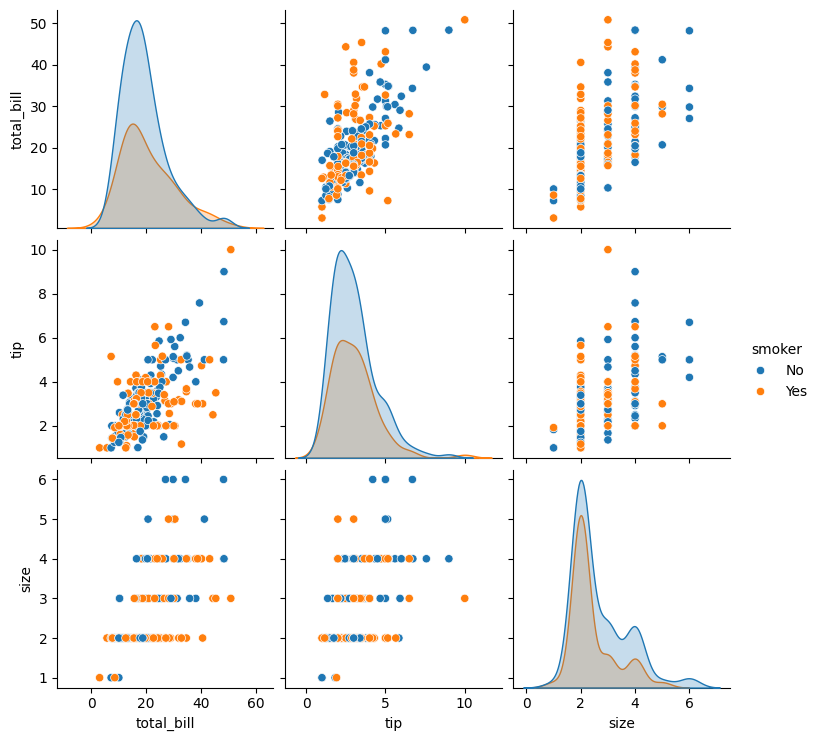

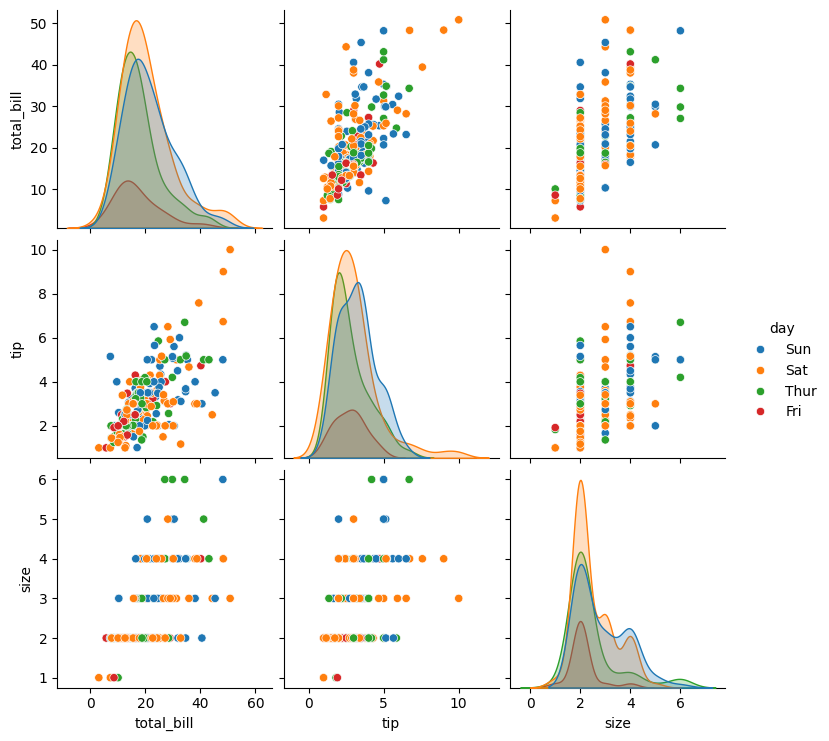

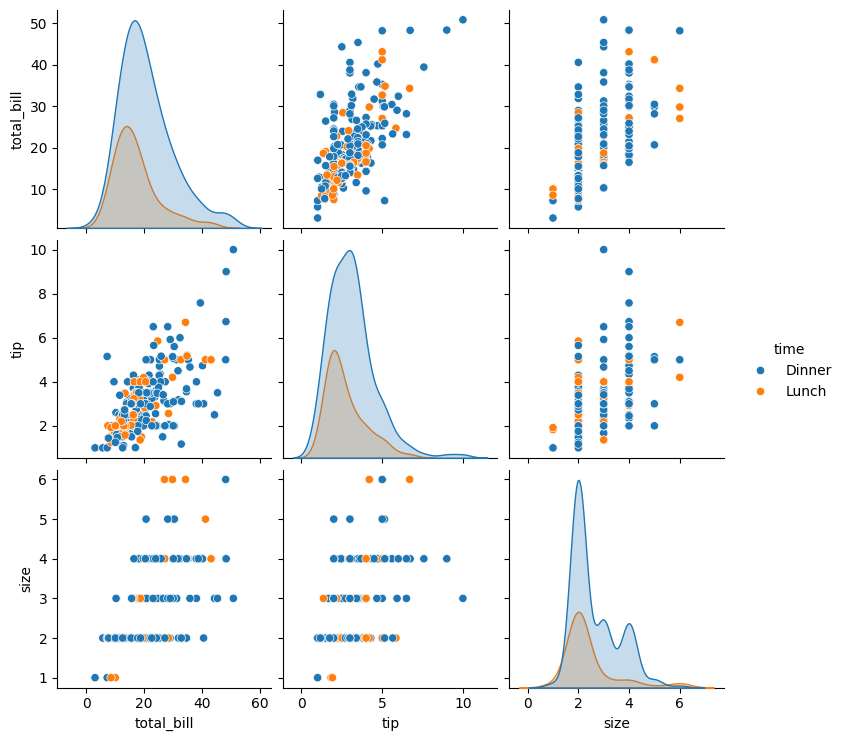

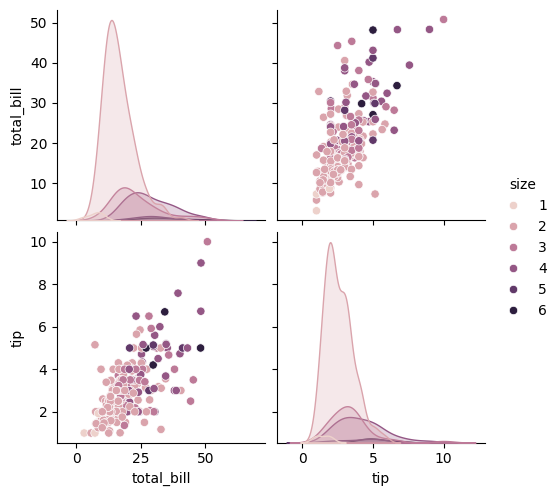

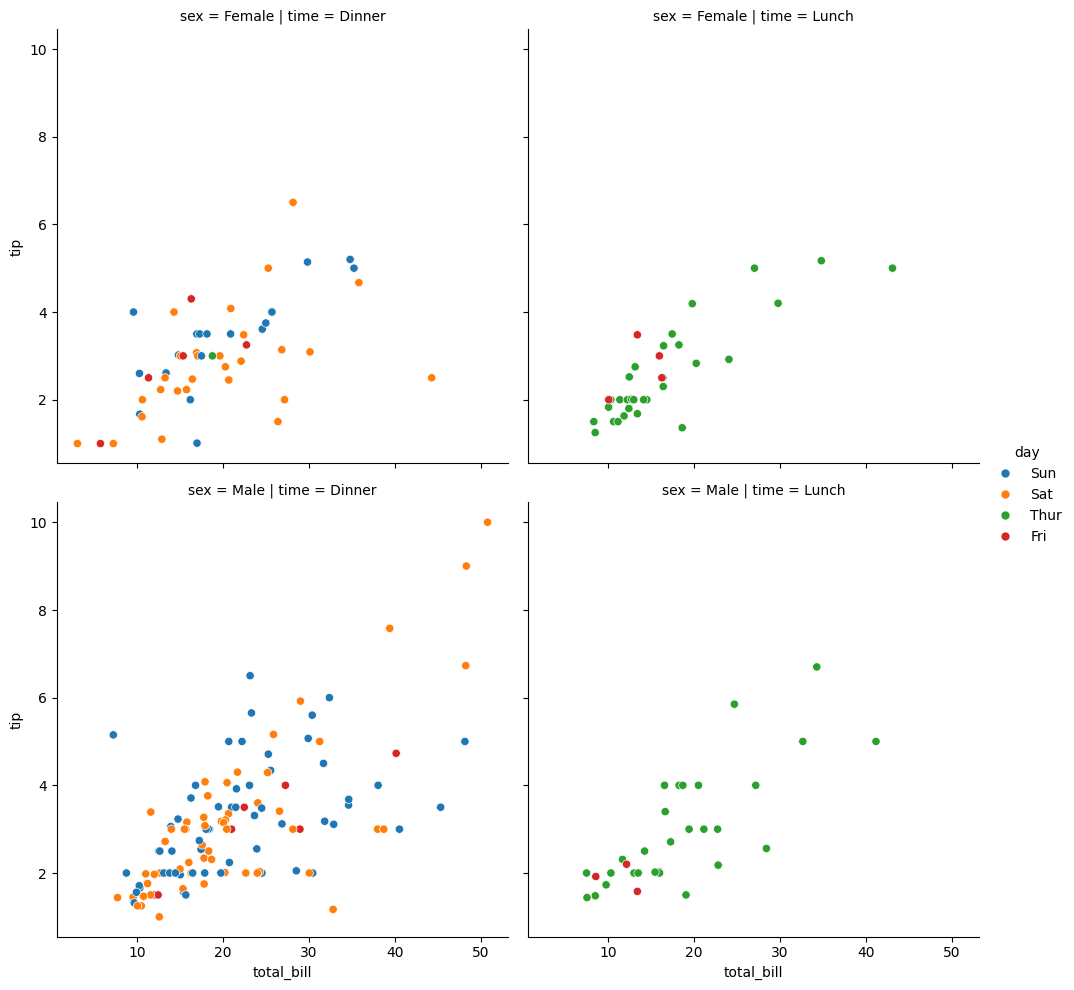

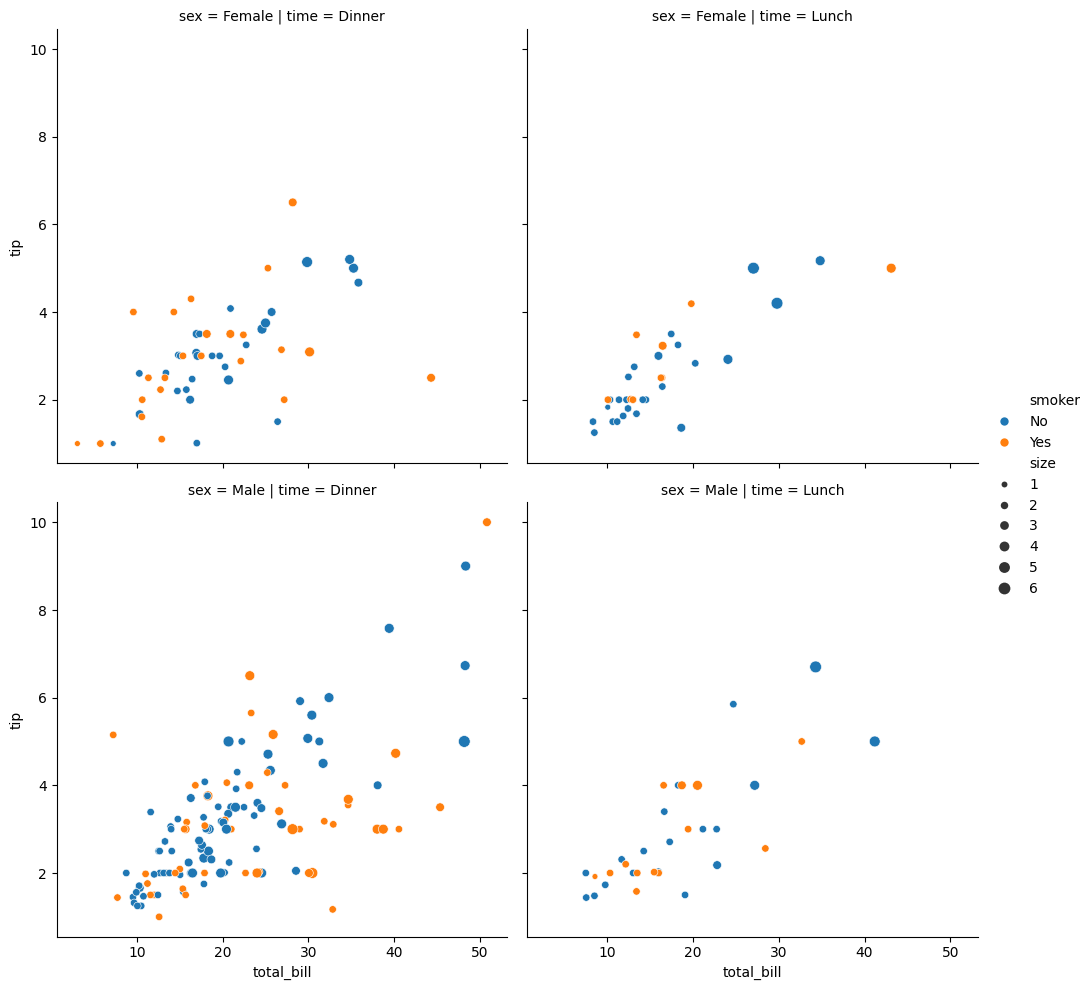

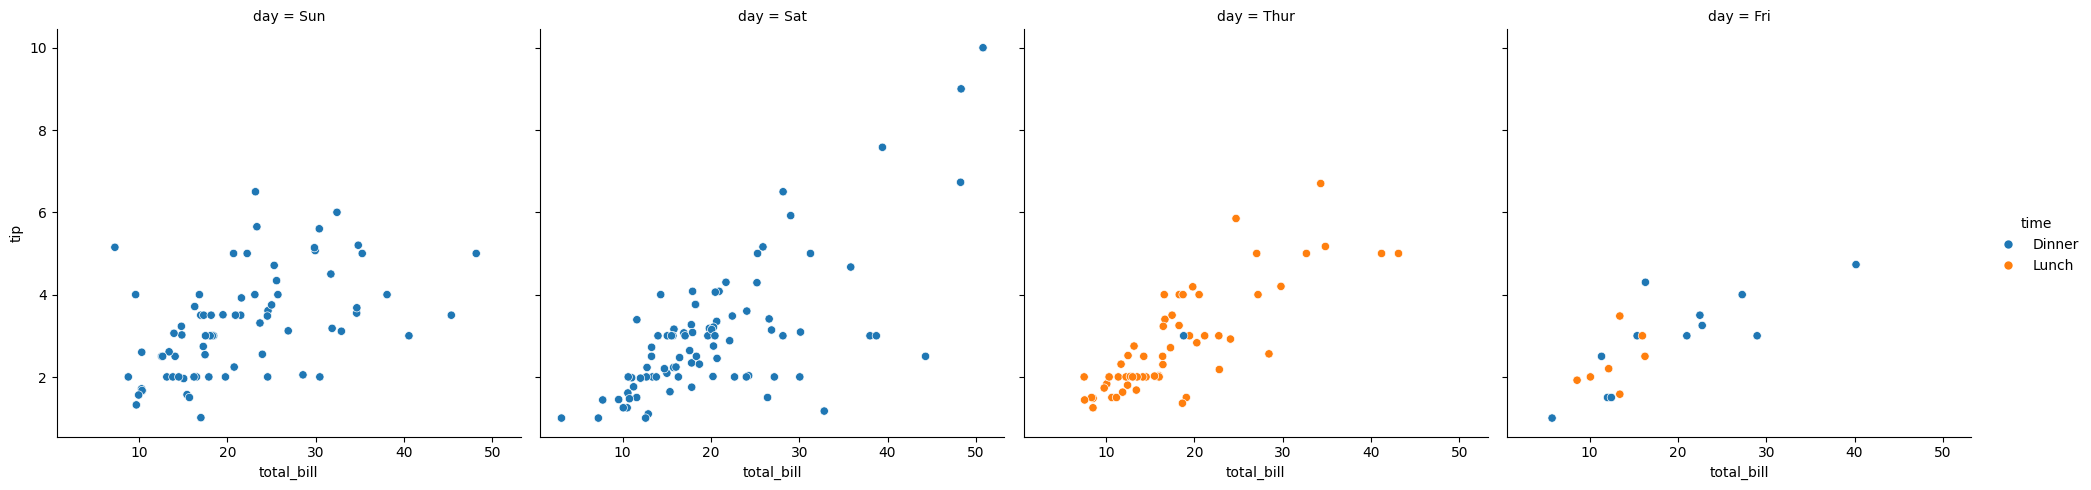

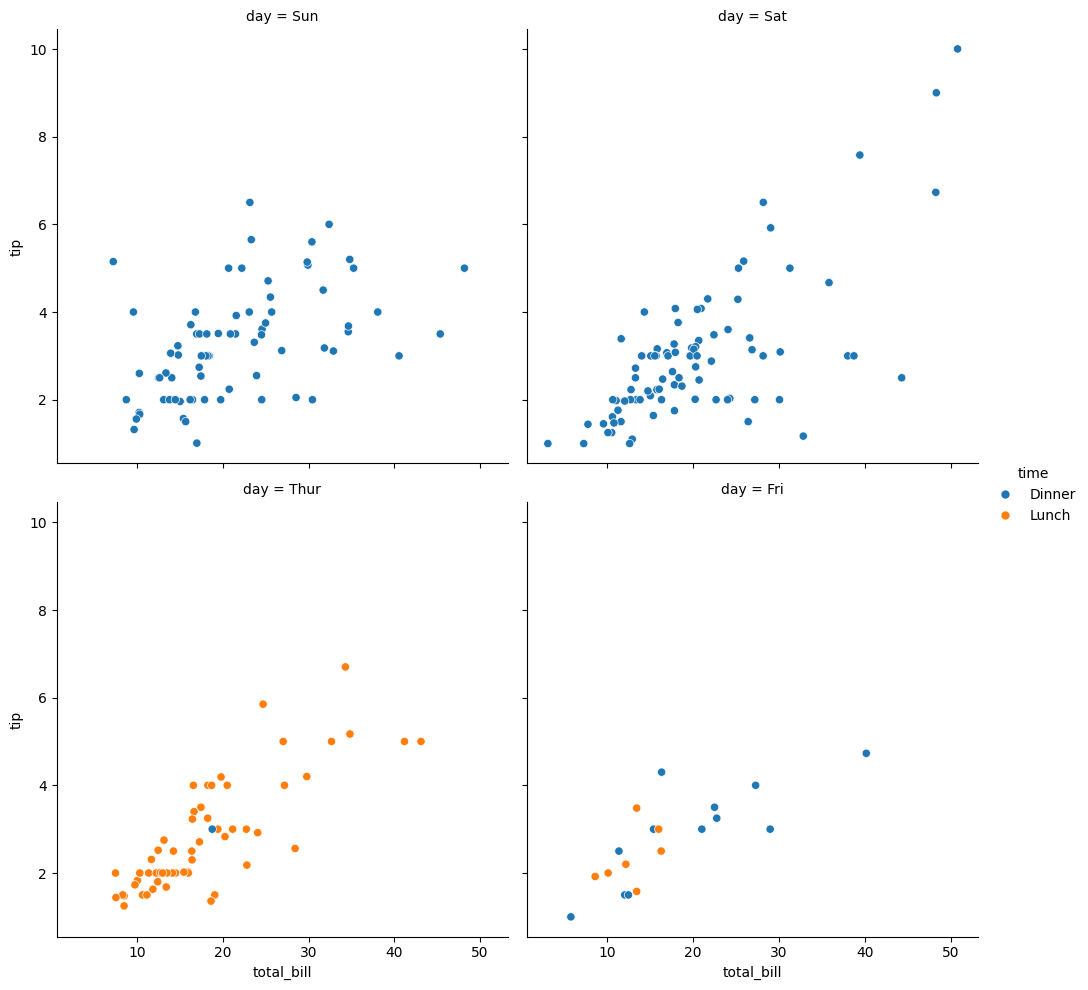

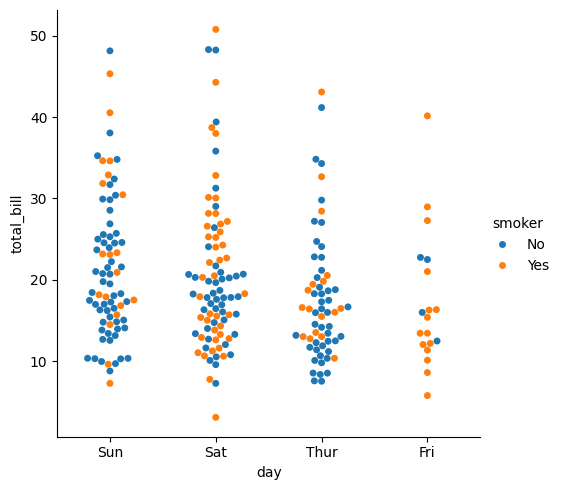

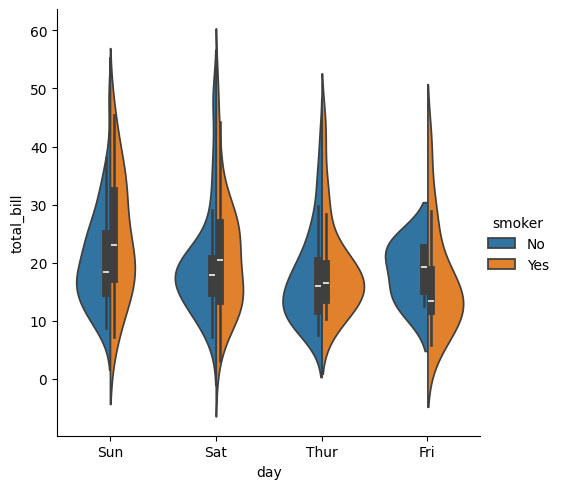

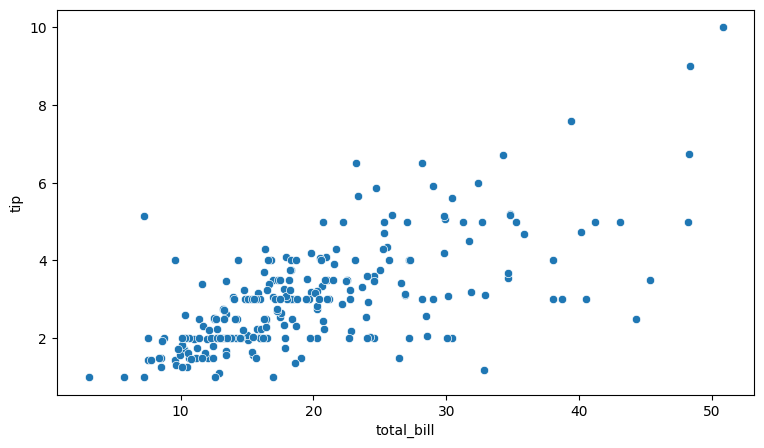

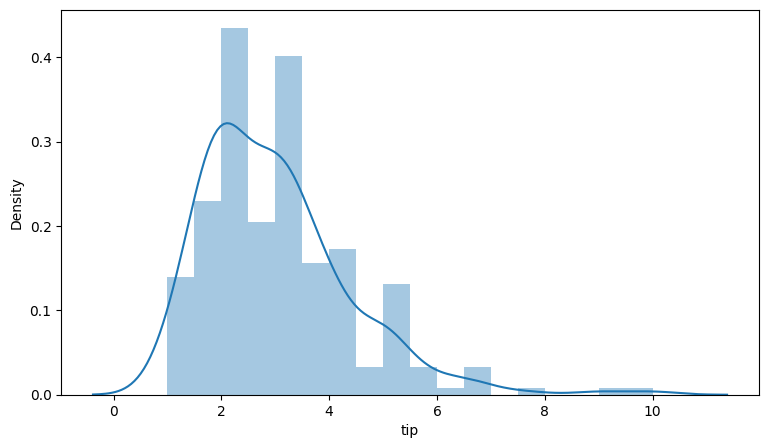

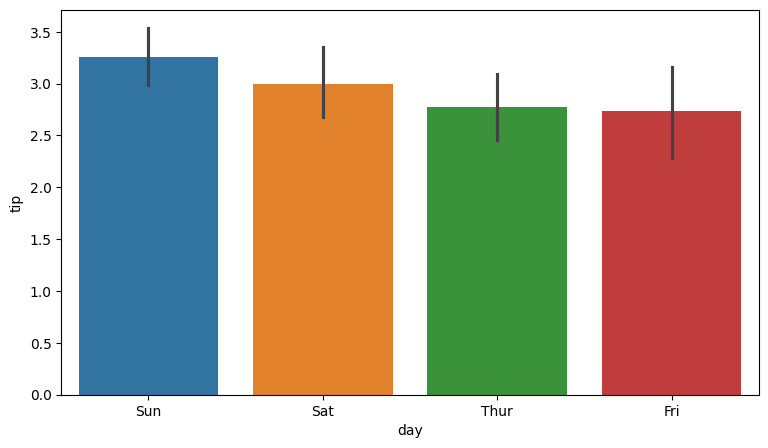

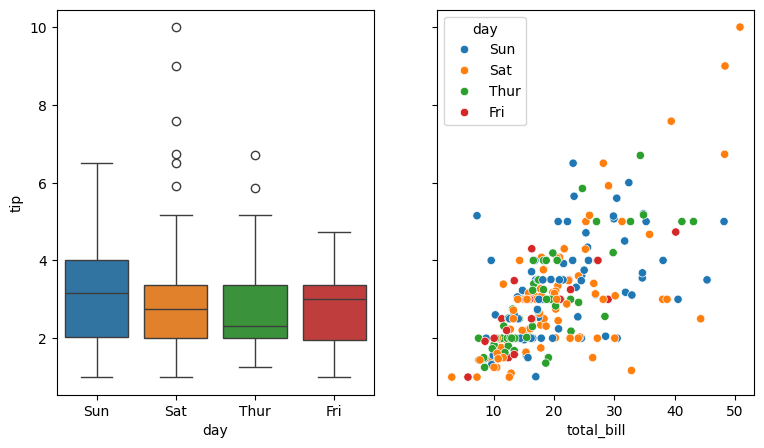

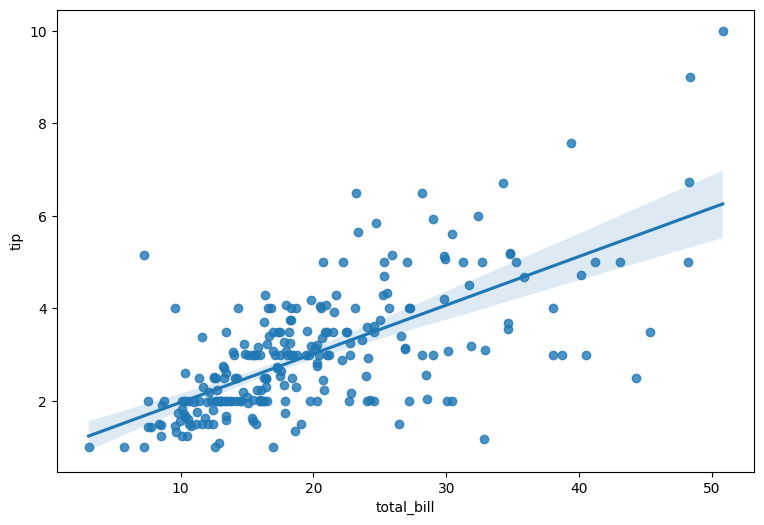

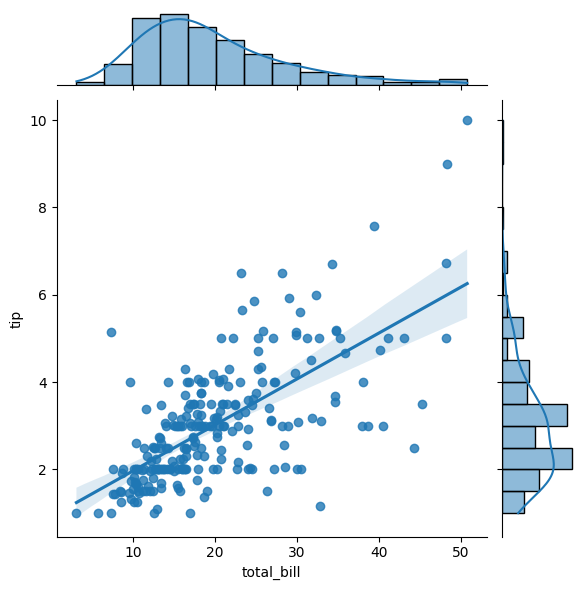

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


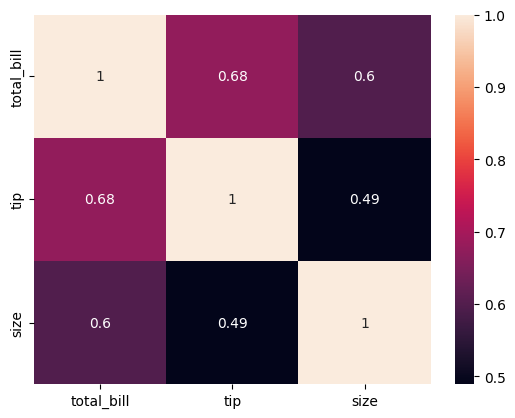




All Variables ------------------------


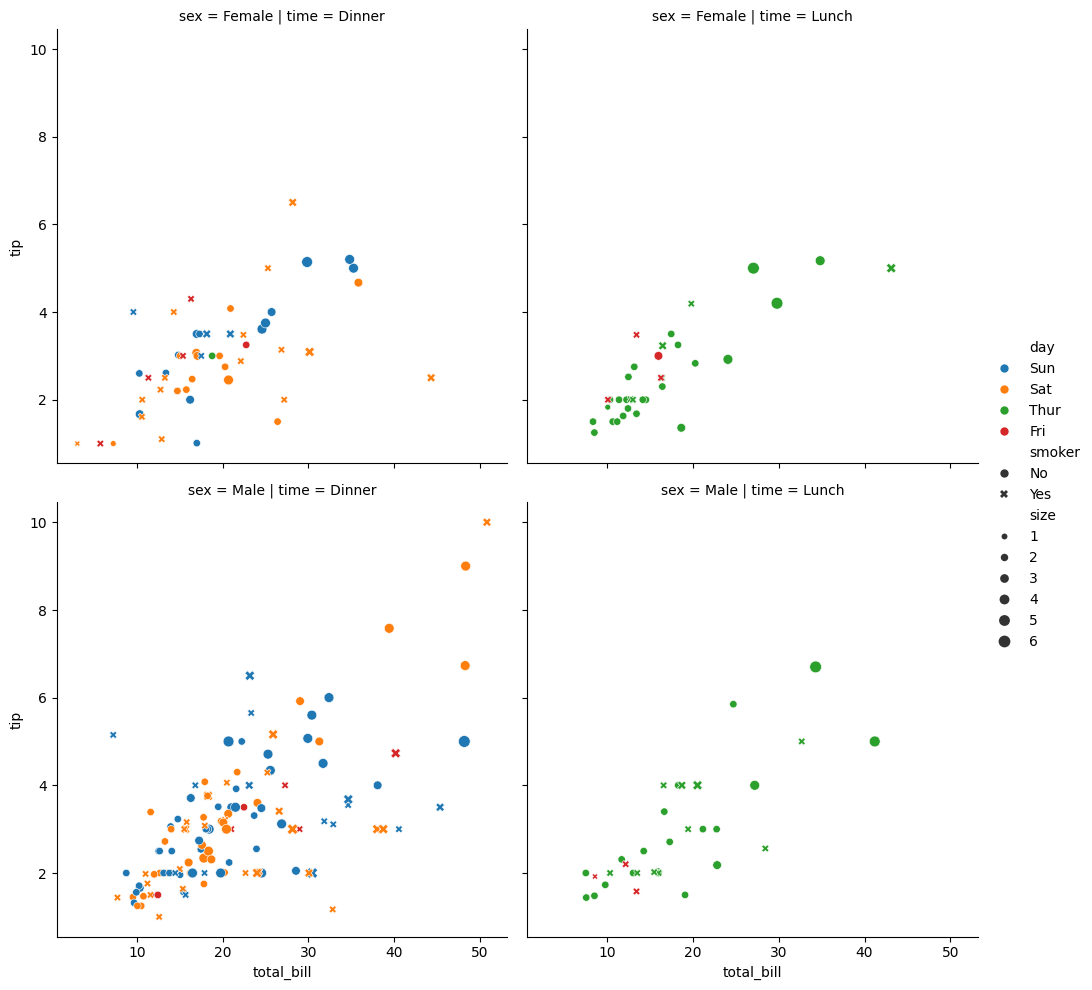

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3


In [2]:
tips = pd.read_csv('04-tips.csv')
print(tips.head(preview_window))
print(tips.describe().T)
# sns.set()
# tips = sns.load_dataset("tips")
# tips.head()
print(tips.info())

if __plot__:
    sns.countplot(x='smoker',data=tips,hue='smoker');
    plt.show()
    sns.countplot(x='sex',data=tips,hue='sex');
    plt.show()
    sns.countplot(x='day',data=tips,hue='day');
    plt.show()
    plt.figure(figsize=(9,6))
    sns.countplot(x='time',data=tips,hue='time');
    plt.show()
    sns.countplot(y='time',data=tips,hue='time');
    plt.show()
    sns.pairplot(tips,corner=True);
    plt.show()
    ## Categorical = 'sex', 'smoker' , 'day', 'time' , 'size'
    sns.pairplot(tips,hue='sex');
    plt.show()
    sns.pairplot(tips,hue='smoker');
    plt.show()
    sns.pairplot(tips,hue='day');
    plt.show()
    sns.pairplot(tips,hue='time');
    plt.show()
    sns.pairplot(tips,hue='size');
    plt.show()
    sns.relplot(x="total_bill", y="tip", hue="day", col="time", row="sex", data=tips);
    plt.show()
    sns.relplot(x="total_bill", y="tip",row="sex", col="time",hue="smoker", size="size",data=tips);
    plt.show()
    sns.relplot(x="total_bill", y="tip", hue="time",col="day", data=tips);
    plt.show()
    sns.relplot(x="total_bill", y="tip", hue="time",col="day", col_wrap=2, data=tips);
    plt.show()
    sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=tips,aspect=1);
    plt.show()
    sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", split=True, data=tips, aspect=1);
    plt.show()
    plt.figure(figsize=(9,5))
    sns.scatterplot(x="total_bill", y="tip", data=tips);
    plt.show()
    plt.figure(figsize=(9,5))
    sns.distplot(tips['tip']);
    plt.show()
    plt.figure(figsize=(9,5))
    sns.barplot(x="day", y="tip", data = tips,hue='day');
    plt.show()
    fig,ax =plt.subplots(1, 2, sharey=True, figsize=(9, 5))
    sns.boxplot(x="day", y="tip", data=tips, ax=ax[0],hue='day')
    sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=ax[1]);
    plt.show()
    plt.figure(figsize=(9,6))
    sns.regplot(x="total_bill", y="tip", data=tips);
    plt.show()
    sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg');
    plt.show()
    corr = tips.corr(numeric_only=True)
    print(corr)
    sns.heatmap(corr,annot=True);
    plt.show()
    

print("\n\n")
print("All Variables ------------------------")
sns.relplot(x="total_bill", y="tip", hue="day", col="time", row="sex", size="size",  style="smoker", data=tips);
plt.show()
    
df = tips.copy()
X = df[['total_bill','size']]
y = df['tip']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=667, test_size=0.3)



print(tips.info())
print(tips.head(preview_window))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int8   
 3   smoker      244 non-null    int8   
 4   day         244 non-null    int8   
 5   time        244 non-null    int8   
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), int8(4)
memory usage: 6.8 KB
None
Correlation analisys


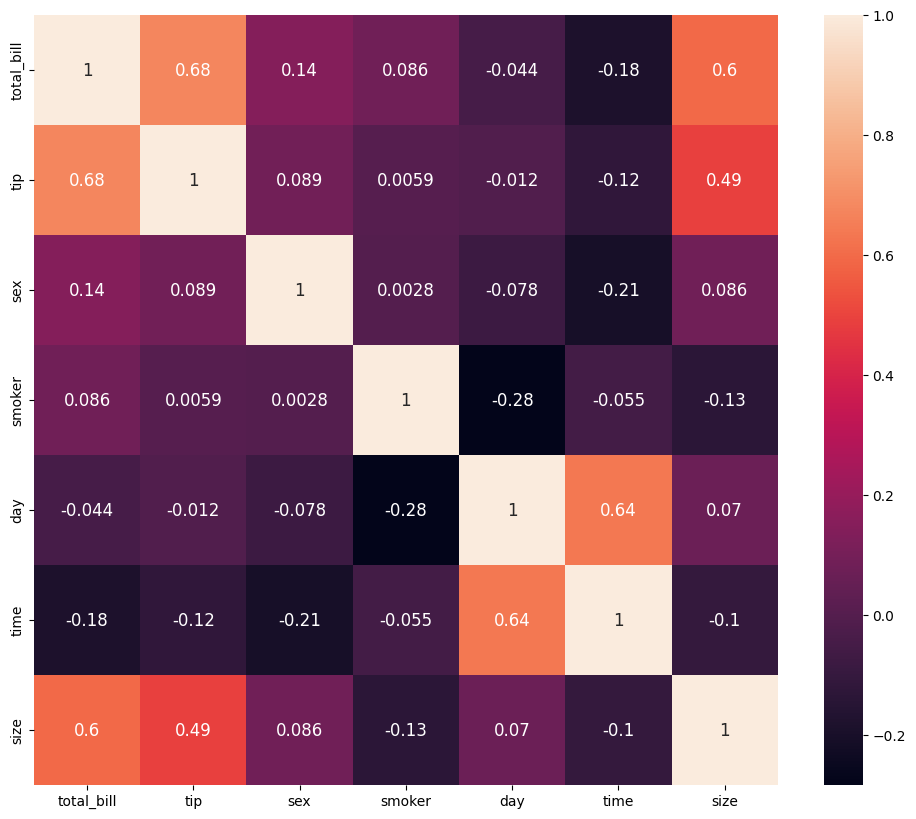

['total_bill' 'tip' 'sex' 'smoker' 'day' 'time' 'size']
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [3]:
# cast string into numeric see in 05-pandas_dtypes

# converto in categorie
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['day']=df['day'].astype('category')
df['time']=df['time'].astype('category')
# converto in interi
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['day']=df['day'].astype('category')
df['time']=df['time'].astype('category')
df['sex']=df['sex'].cat.codes
df['smoker']=df['smoker'].cat.codes
df['day']=df['day'].cat.codes
df['time']=df['time'].cat.codes

print(df.info())
corrmat = correlation_plot(df)

            total_bill  tip       sex    smoker       day      time      size
Corr Value    0.675734  1.0  0.088862  0.005929 -0.011548 -0.121629  0.489299
['total_bill' 'tip' 'sex' 'smoker' 'day' 'time' 'size']
   total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    0       0    2     0     2
1       10.34  1.66    1       0    2     0     3
(244, 7)


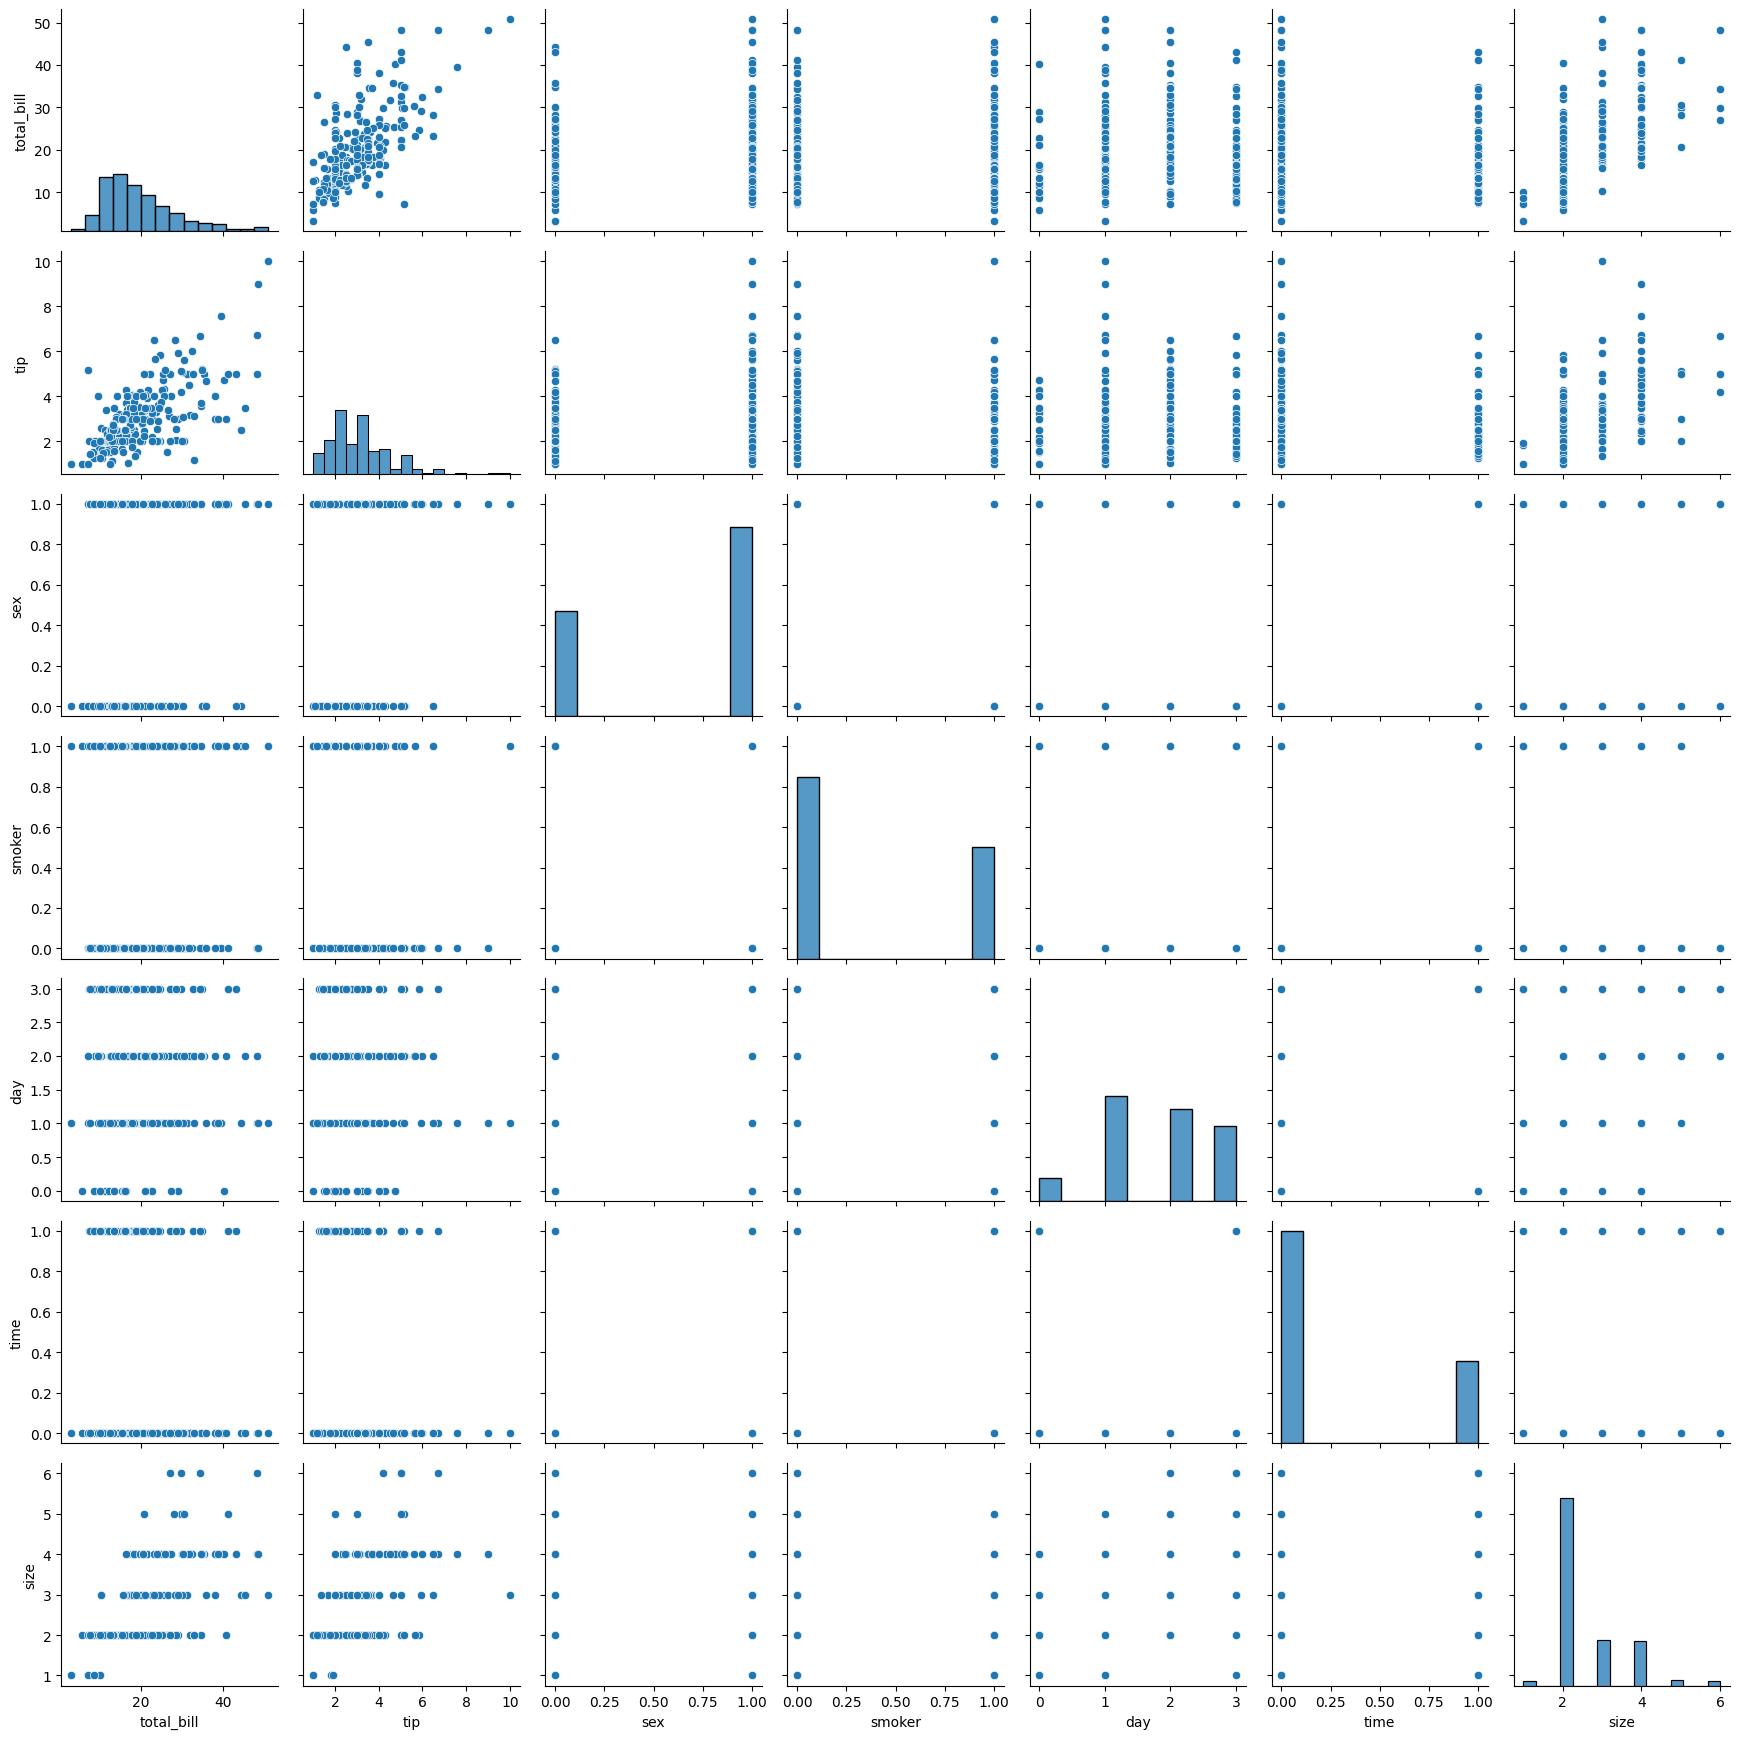

Correlation analisys


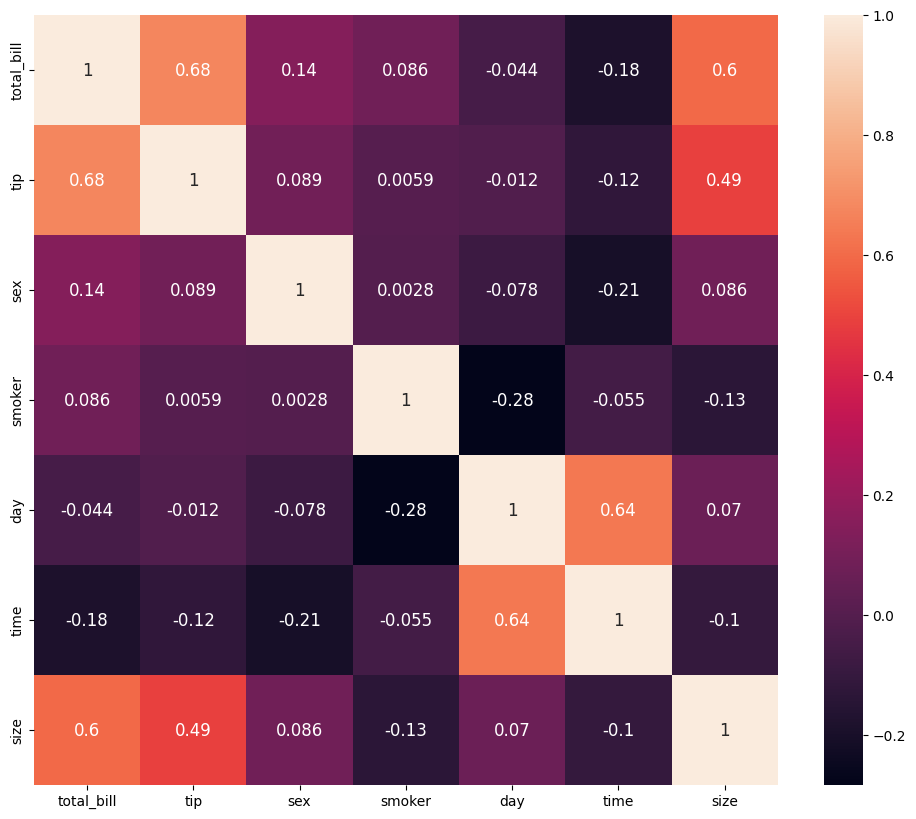

['total_bill' 'tip' 'sex' 'smoker' 'day' 'time' 'size']
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
              0      1      2      3      4      5     6      7      8    \
total_bill  16.99  10.34  21.01  23.68  24.59  25.29  8.77  26.88  15.04   
tip          1.01   1.66   3.50   3.31   3.61   4.71  2.00   3.12   1.96   
sex          0.00   1.00   1.00   1.00   0.00   1.00  1.00   1.00   1.00   
smoker       0.00   0.00   0.00   0.00   0.00   0.00  0.00   0.00   0.00   
day          2.00   2.00   2.00   2.00   2.00   2.00  2.00   2.00   2.00   
time         0.00   0.00   0.00   0.00   0.00   0.00  0.00   0.00   0.00   
size         2.00   3.00   3.00   2.00   4.00   4.00  2.00   4.00   2.00   

              9    ...    234    235   236    237    238    239    240    241  \
total_bill  14.78  ...  15.53  10.07  12.6  32.83  35.83  29.03  27.18  22.67   
tip          3.23  ...   3.00   1.25   1.0   1.17   4.67   5.92   2.00   2.00   
sex    

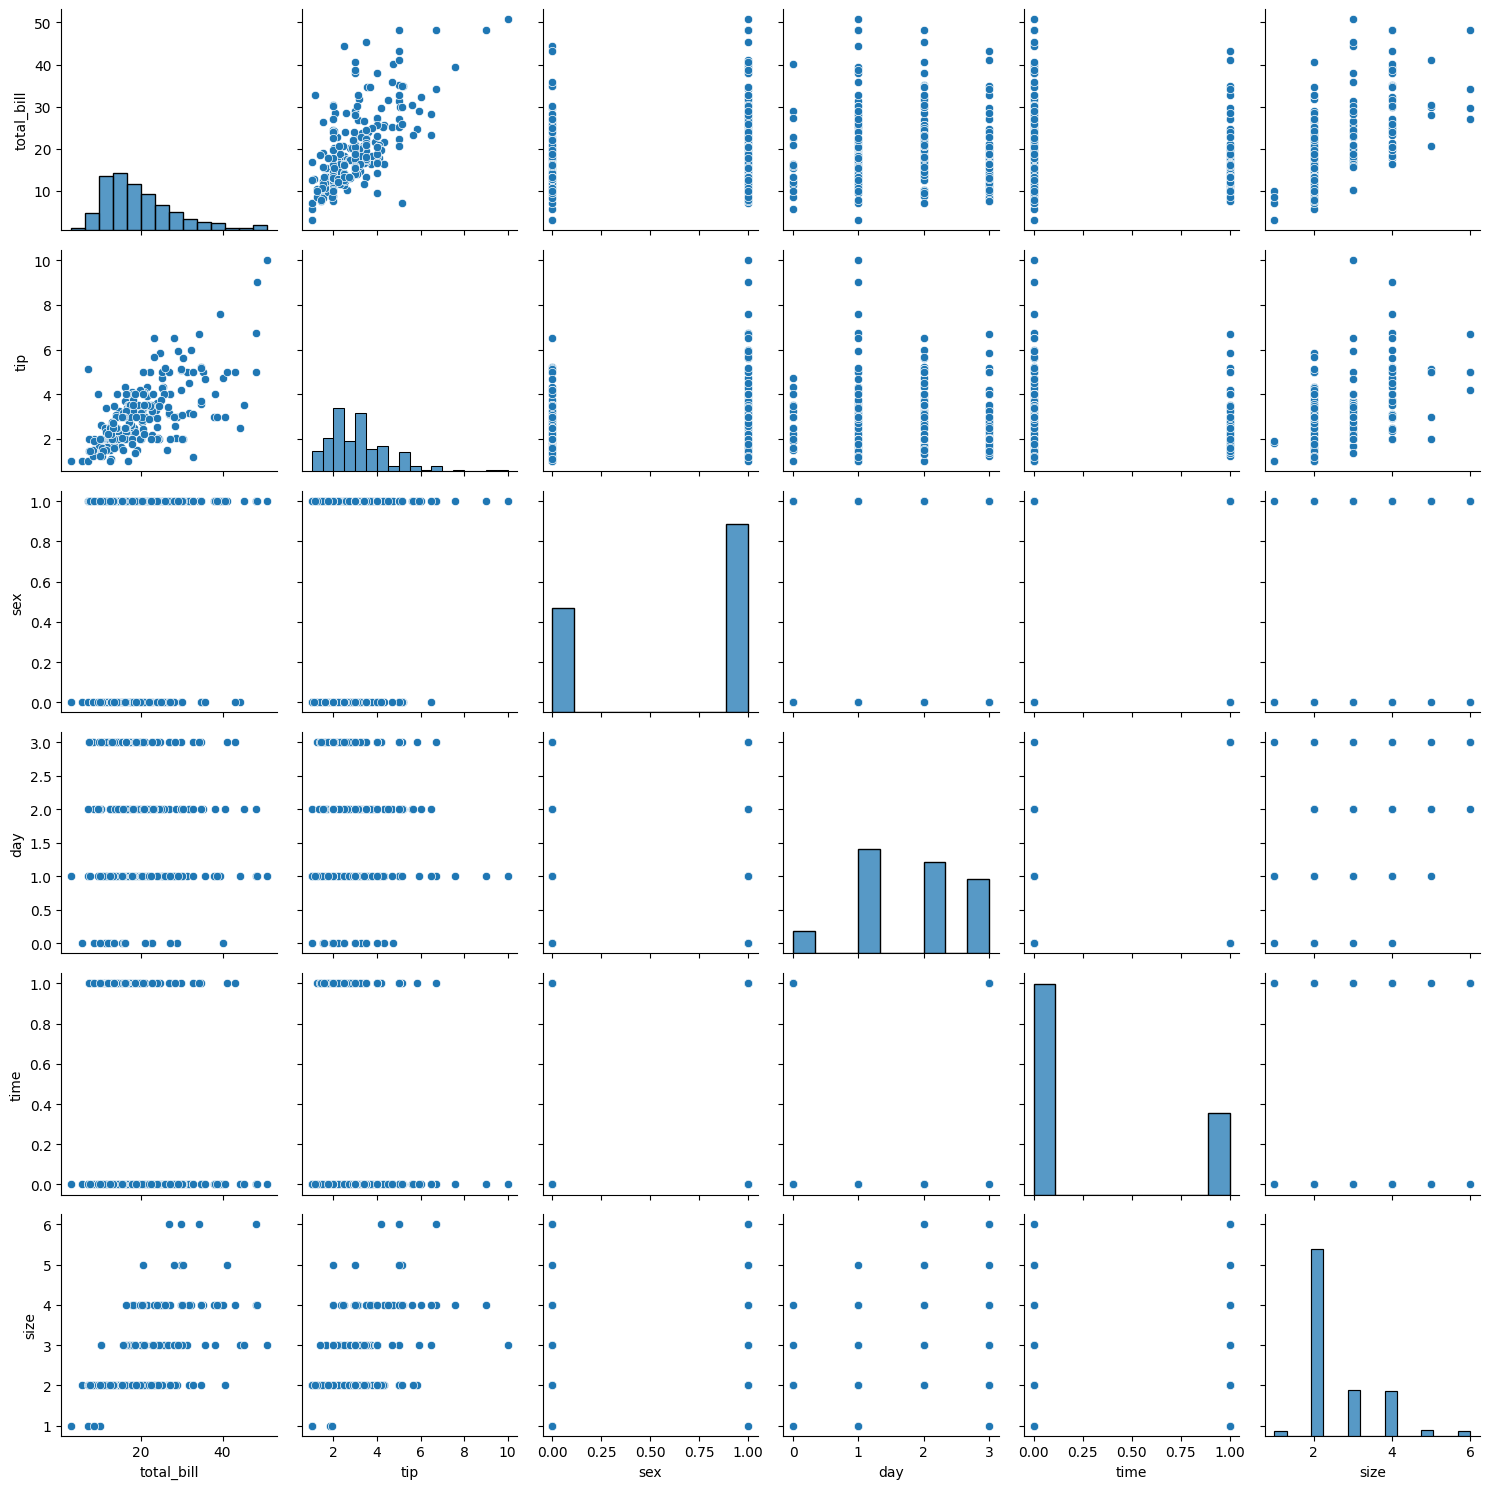

Correlation analisys


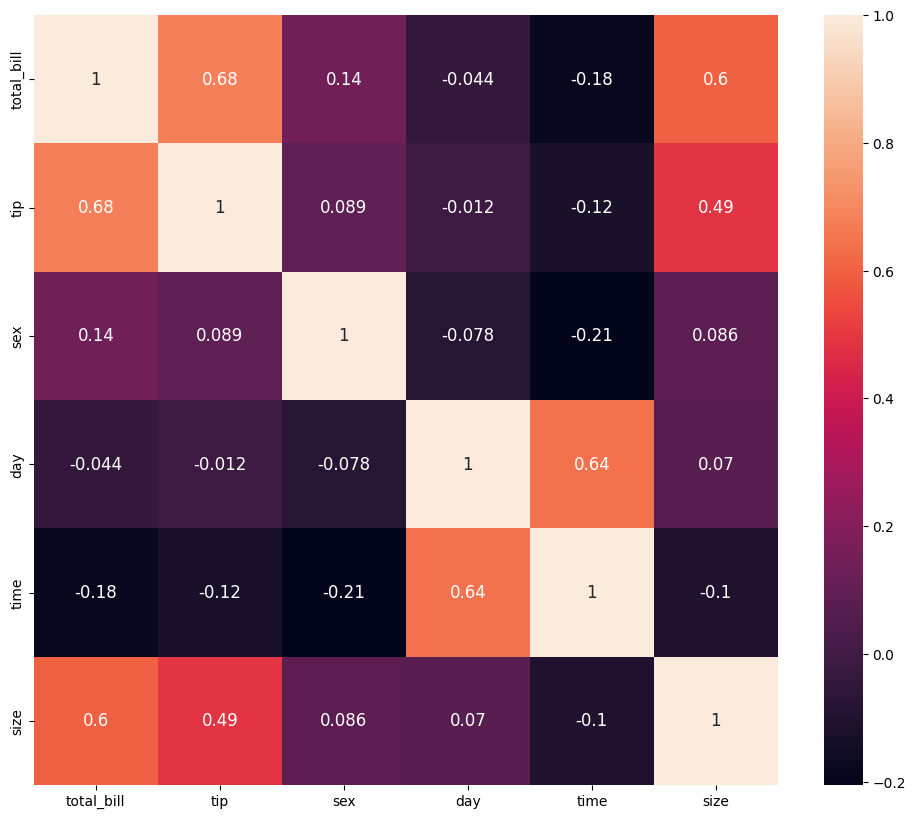

['total_bill' 'tip' 'sex' 'day' 'time' 'size']
Index(['total_bill', 'tip', 'sex', 'day', 'time', 'size'], dtype='object')
              0      1      2      3      4      5     6      7      8    \
total_bill  16.99  10.34  21.01  23.68  24.59  25.29  8.77  26.88  15.04   
tip          1.01   1.66   3.50   3.31   3.61   4.71  2.00   3.12   1.96   
sex          0.00   1.00   1.00   1.00   0.00   1.00  1.00   1.00   1.00   
day          2.00   2.00   2.00   2.00   2.00   2.00  2.00   2.00   2.00   
time         0.00   0.00   0.00   0.00   0.00   0.00  0.00   0.00   0.00   
size         2.00   3.00   3.00   2.00   4.00   4.00  2.00   4.00   2.00   

              9    ...    234    235   236    237    238    239    240    241  \
total_bill  14.78  ...  15.53  10.07  12.6  32.83  35.83  29.03  27.18  22.67   
tip          3.23  ...   3.00   1.25   1.0   1.17   4.67   5.92   2.00   2.00   
sex          1.00  ...   1.00   1.00   1.0   1.00   0.00   1.00   0.00   1.00   
day          2.00  ..

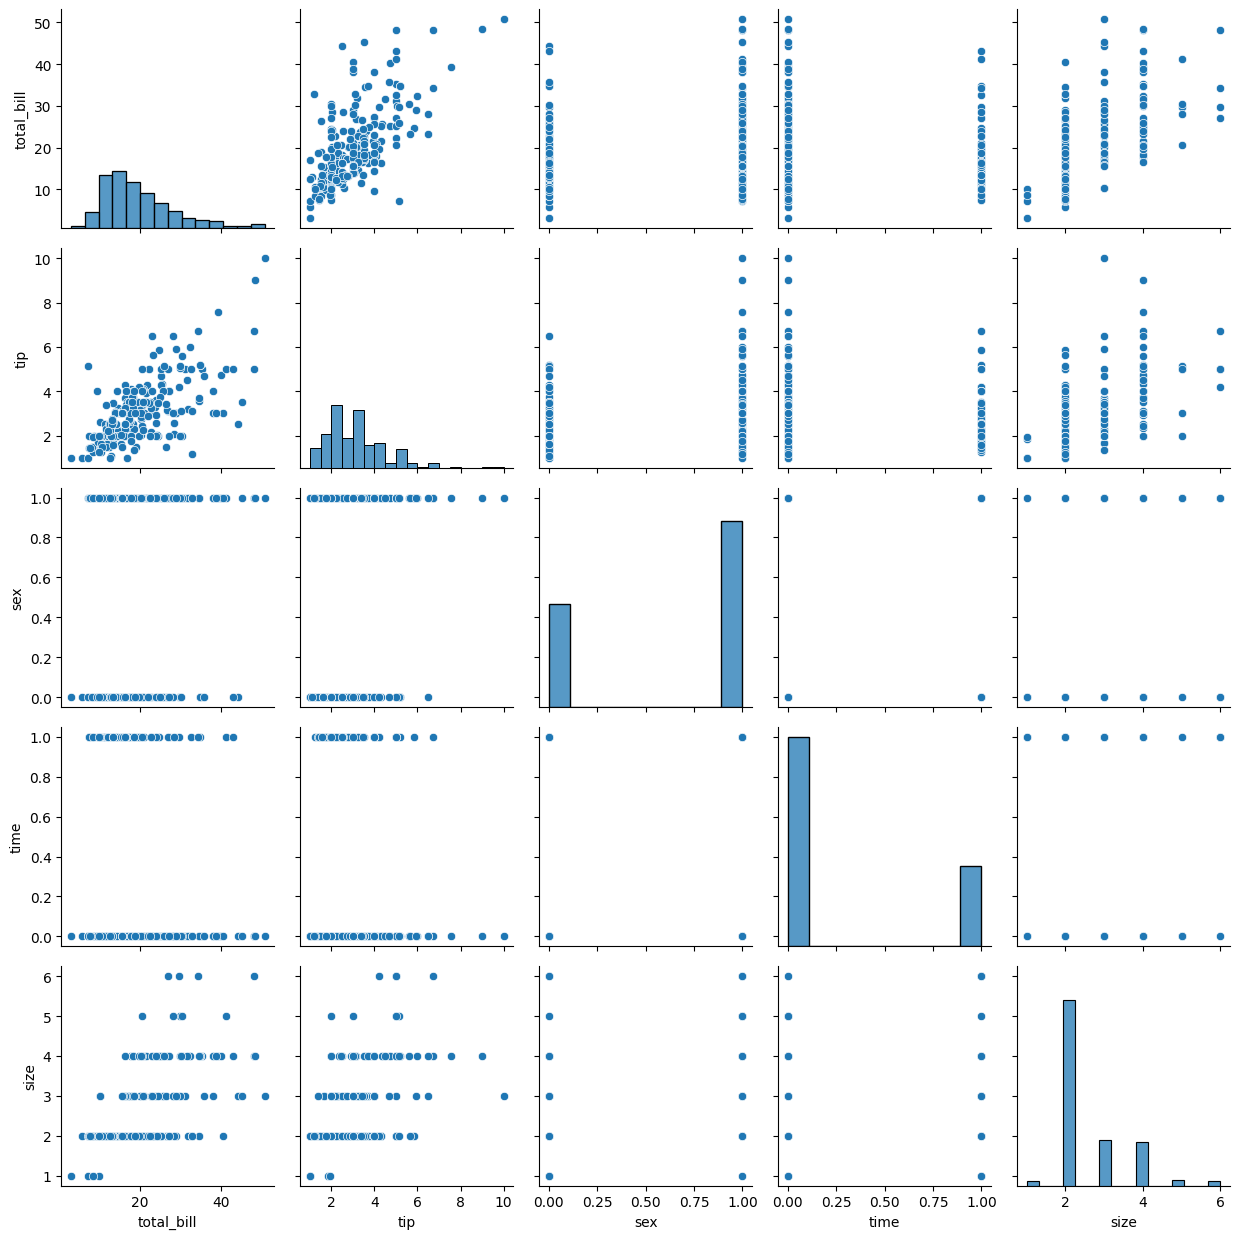

Correlation analisys


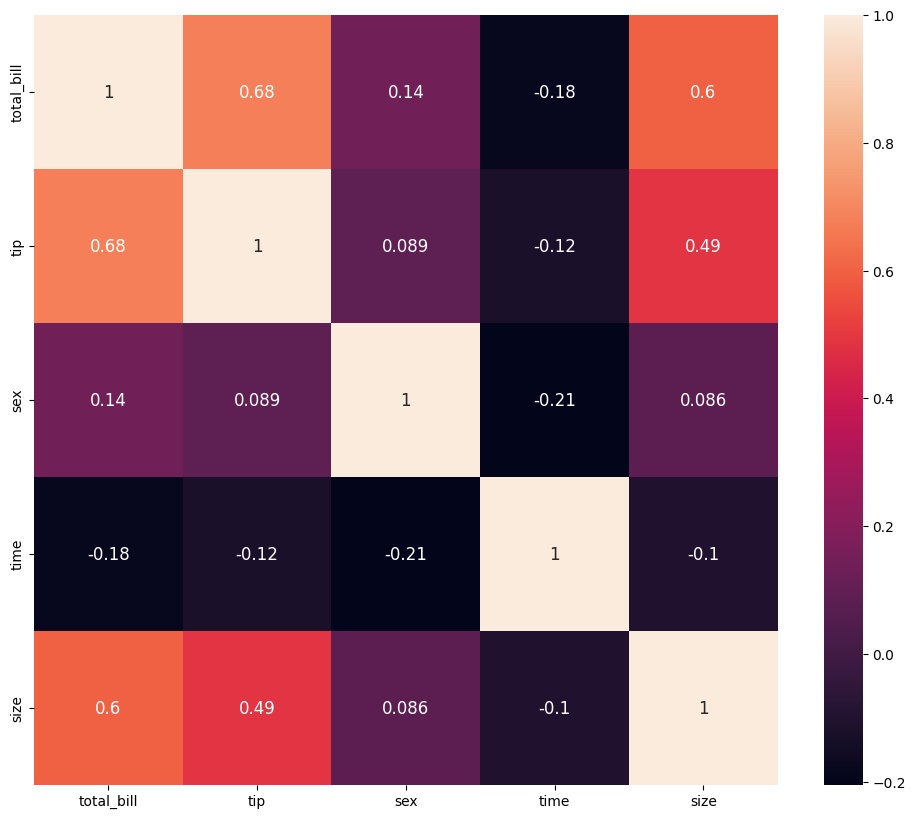

['total_bill' 'tip' 'sex' 'time' 'size']
Index(['total_bill', 'tip', 'sex', 'time', 'size'], dtype='object')
              0      1      2      3      4      5     6      7      8    \
total_bill  16.99  10.34  21.01  23.68  24.59  25.29  8.77  26.88  15.04   
tip          1.01   1.66   3.50   3.31   3.61   4.71  2.00   3.12   1.96   
sex          0.00   1.00   1.00   1.00   0.00   1.00  1.00   1.00   1.00   
time         0.00   0.00   0.00   0.00   0.00   0.00  0.00   0.00   0.00   
size         2.00   3.00   3.00   2.00   4.00   4.00  2.00   4.00   2.00   

              9    ...    234    235   236    237    238    239    240    241  \
total_bill  14.78  ...  15.53  10.07  12.6  32.83  35.83  29.03  27.18  22.67   
tip          3.23  ...   3.00   1.25   1.0   1.17   4.67   5.92   2.00   2.00   
sex          1.00  ...   1.00   1.00   1.0   1.00   0.00   1.00   0.00   1.00   
time         0.00  ...   0.00   0.00   0.0   0.00   0.00   0.00   0.00   0.00   
size         2.00  ...   2.00

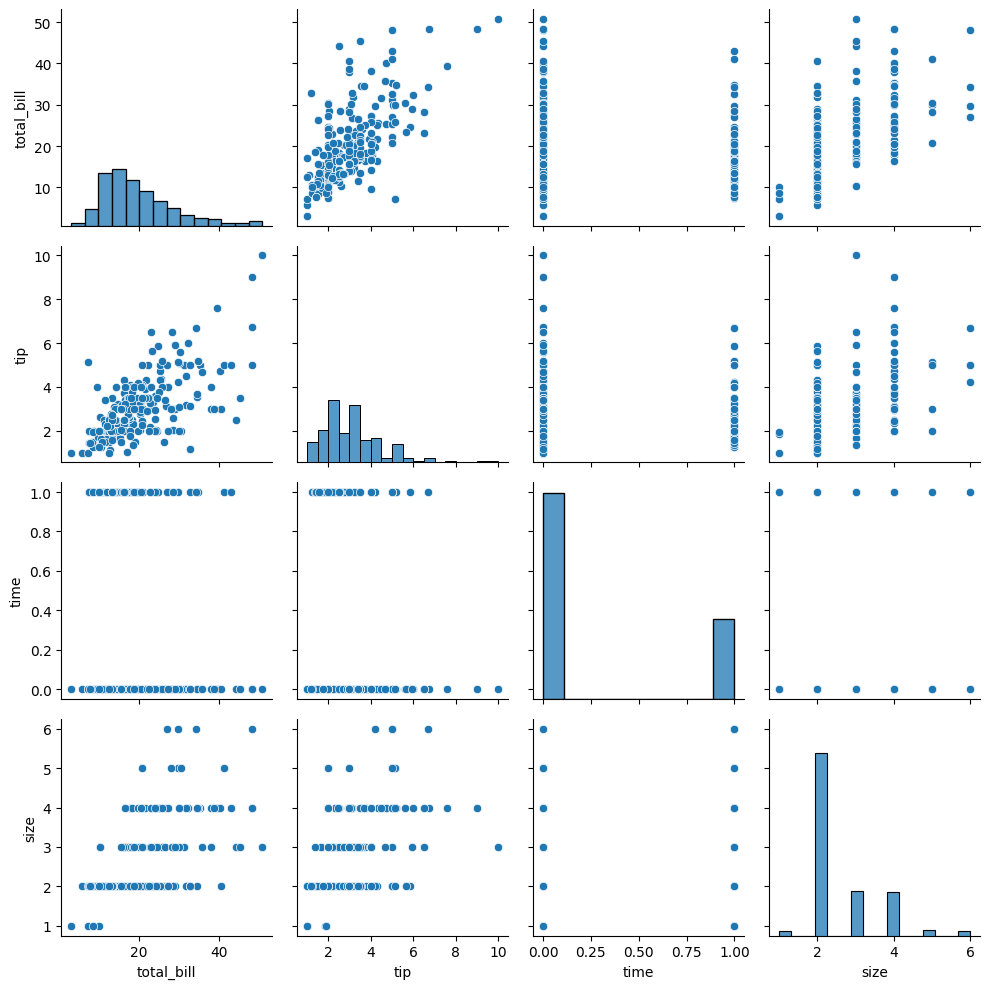

Correlation analisys


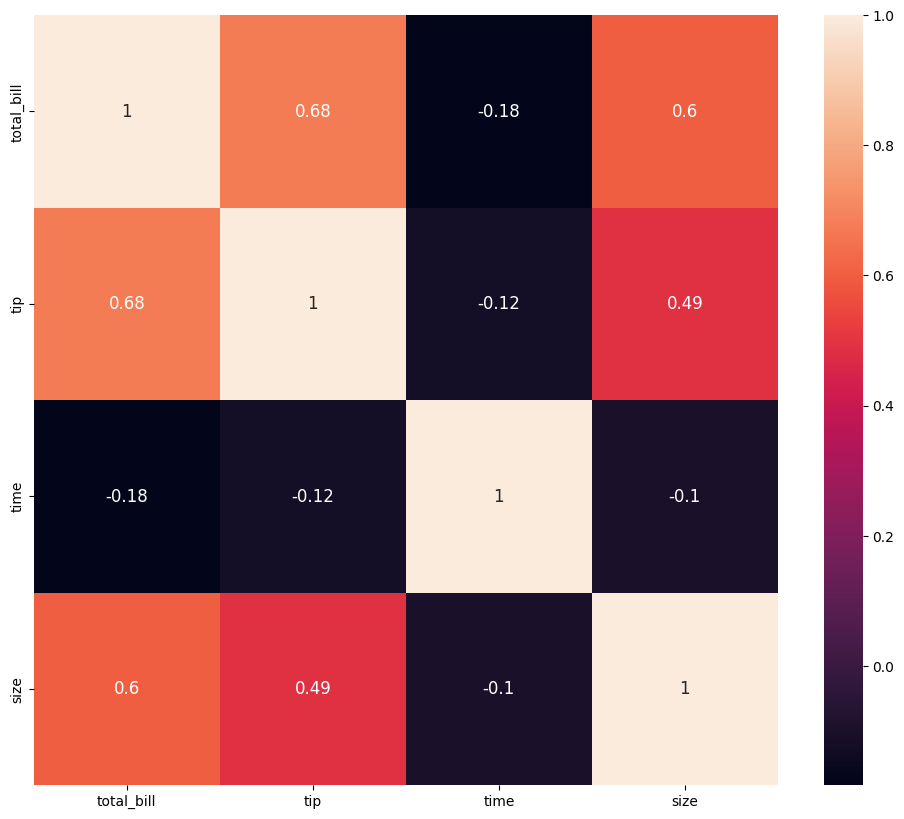

['total_bill' 'tip' 'time' 'size']
Index(['total_bill', 'tip', 'time', 'size'], dtype='object')
              0      1      2      3      4      5     6      7      8    \
total_bill  16.99  10.34  21.01  23.68  24.59  25.29  8.77  26.88  15.04   
tip          1.01   1.66   3.50   3.31   3.61   4.71  2.00   3.12   1.96   
time         0.00   0.00   0.00   0.00   0.00   0.00  0.00   0.00   0.00   
size         2.00   3.00   3.00   2.00   4.00   4.00  2.00   4.00   2.00   

              9    ...    234    235   236    237    238    239    240    241  \
total_bill  14.78  ...  15.53  10.07  12.6  32.83  35.83  29.03  27.18  22.67   
tip          3.23  ...   3.00   1.25   1.0   1.17   4.67   5.92   2.00   2.00   
time         0.00  ...   0.00   0.00   0.0   0.00   0.00   0.00   0.00   0.00   
size         2.00  ...   2.00   2.00   2.0   2.00   3.00   3.00   2.00   2.00   

              242    243  
total_bill  17.82  18.78  
tip          1.75   3.00  
time         0.00   0.00  
size     

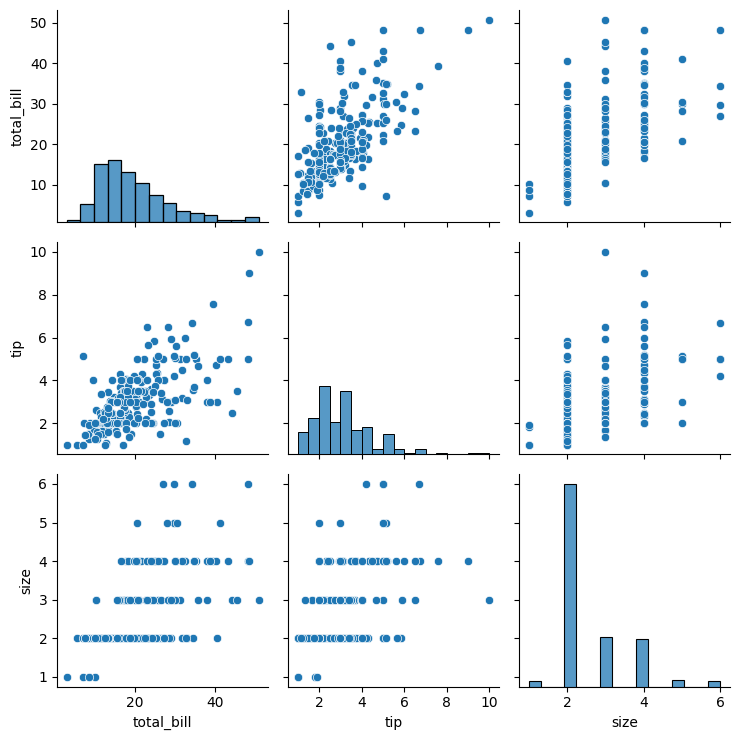

Correlation analisys


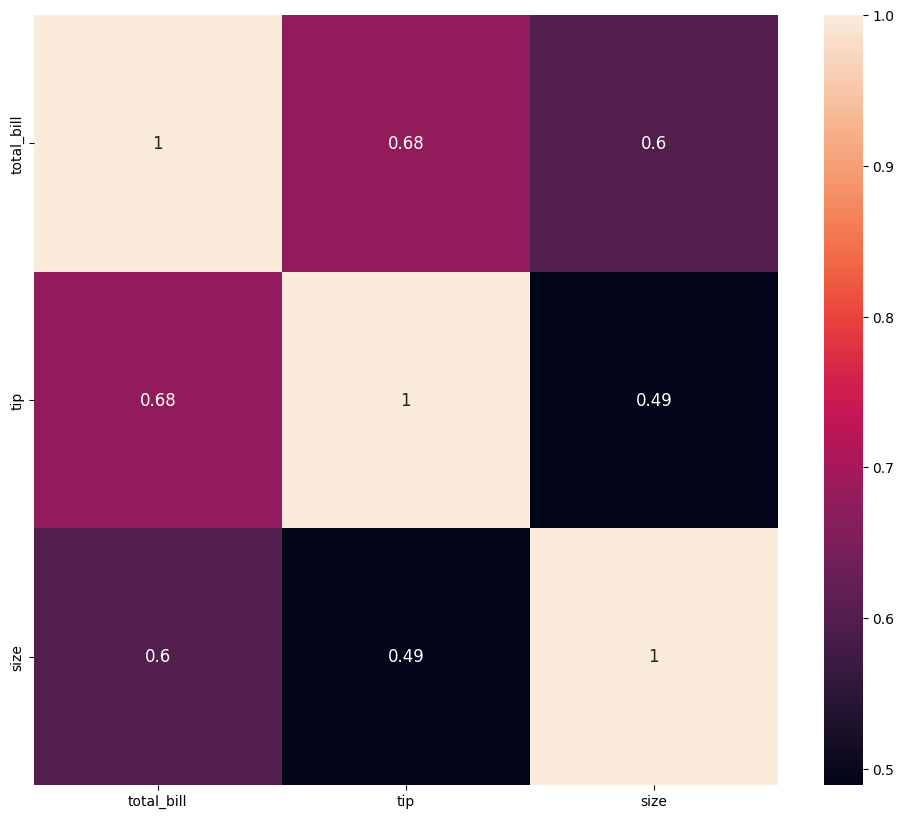

['total_bill' 'tip' 'size']
Index(['total_bill', 'tip', 'size'], dtype='object')
              0      1      2      3      4      5     6      7      8    \
total_bill  16.99  10.34  21.01  23.68  24.59  25.29  8.77  26.88  15.04   
tip          1.01   1.66   3.50   3.31   3.61   4.71  2.00   3.12   1.96   
size         2.00   3.00   3.00   2.00   4.00   4.00  2.00   4.00   2.00   

              9    ...    234    235   236    237    238    239    240    241  \
total_bill  14.78  ...  15.53  10.07  12.6  32.83  35.83  29.03  27.18  22.67   
tip          3.23  ...   3.00   1.25   1.0   1.17   4.67   5.92   2.00   2.00   
size         2.00  ...   2.00   2.00   2.0   2.00   3.00   3.00   2.00   2.00   

              242    243  
total_bill  17.82  18.78  
tip          1.75   3.00  
size         2.00   2.00  

[3 rows x 244 columns]
   total_bill   tip  size
0       16.99  1.01     2
1       10.34  1.66     3
R2 score 0.3823257056564452
MSE score 0.7042152222374156
MAE score 0.6026856352

In [4]:
threshold_list = [0.0,0.01,0.02,0.09,0.18]
ts_analisys(threshold_list)

# Cross validation

In [5]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
model.fit(X_train, y_train) # modello con tutto
scores = cross_val_score(model, X, y, cv=5 , scoring='r2')
scores

array([0.53404571, 0.61085627, 0.51123501, 0.25355216, 0.41897975])